In [1]:
import os
import pickle
import cv2
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib
import statistics as stat
import tensorflow as tf
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from tqdm import tqdm

In [2]:
### from tensorflow.python.client import device_lib
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
#print(device_lib.list_local_devices())

Num GPUs Available:  1


In [3]:
with open('Models/model1.json', 'r') as j_file:
    loaded_model_json = j_file.read()
model1 = tf.keras.models.model_from_json(loaded_model_json)
model1.load_weights("Models/model1.h5")

In [65]:
def loadPreprocess():
    ### Load In Data
    (trainX, trainY), (testX, testY) = tf.keras.datasets.cifar10.load_data()
    trainY = tf.keras.utils.to_categorical(trainY)
    testY = tf.keras.utils.to_categorical(testY)
    return [trainX/255, trainY, testX/255, testY]

def returnClassIndex(trainY,class_index):
    labels = np.argmax(trainY, axis = 1)
    return [ i for i in range(len(labels)) if labels[i] == class_index]

trainX, trainY, testX, testY = loadPreprocess()
extractor  = tf.keras.Model(inputs = model1.input,
                         outputs = model1.get_layer(model1.layers[-3].name).output
                        )
model1.compile(optimizer = tf.keras.optimizers.Adam(), 
               loss = "categorical_crossentropy",  metrics= ['accuracy']
              )


In [7]:
### Extract features and train Model
features = extractor.predict(trainX, verbose =1)
k = KMeans(n_clusters = 10, n_init = 20)
k.fit(features)

50000/50000 [==============================] - 9s 183us/sample


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=20, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [8]:
df1 = pd.read_csv('data/SkinDiseaseDataset/ISIC_2019_Test_Metadata.csv')
df2 = pd.read_csv('data/SkinDiseaseDataset/ISIC_2019_Training_GroundTruth.csv')
df3 = pd.read_csv('data/SkinDiseaseDataset/ISIC_2019_Training_Metadata.csv')

In [9]:
df1.head()

,image,age_approx,anatom_site_general,sex
0,ISIC_0034321,60.0,NaN,female
1,ISIC_0034322,70.0,anterior torso,male
2,ISIC_0034323,70.0,lower extremity,male
3,ISIC_0034324,70.0,lower extremity,male
4,ISIC_0034325,30.0,upper extremity,female


In [10]:
df2.head()

,image,MEL,NV,BCC,AK,BKL,DF,VASC,SCC,UNK
0,ISIC_0000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ISIC_0000001,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,ISIC_0000002,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,ISIC_0000003,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,ISIC_0000004,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
df3.head()

,image,age_approx,anatom_site_general,lesion_id,sex
0,ISIC_0000000,55.0,anterior torso,NaN,female
1,ISIC_0000001,30.0,anterior torso,NaN,female
2,ISIC_0000002,60.0,upper extremity,NaN,female
3,ISIC_0000003,30.0,upper extremity,NaN,male
4,ISIC_0000004,80.0,posterior torso,NaN,male


Skin disease Dataset


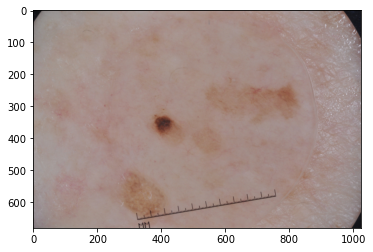

In [63]:
i = 2234
skin_dis_images =  list(df2.image)
tmp_img = plt.imread('data/ISIC_2019_Training_Input/{}.jpg'.format(skin_dis_images[i]))
print("Skin disease Dataset")
plt.imshow(tmp_img)
tmp = cv2.resize(tmp_img, (32,32))
tmp = np.expand_dims(tmp, axis = 0)
skin_disease_feature = extractor.predict(tmp, verbose = 0)
cluster_distances = k.transform(skin_disease_feature)
if (np.amin(cluster_distances)>12):
    ### Flag Image
    plt.imsave('flagged_images/image{}.jpg'.format(i),tmp_img)
else:
    pred = model1.predict(tmp)
    print(pred)

In [60]:
np.amin(cluster_distances)<12

False

In [51]:
np.argmin(cluster_distances)

1

In [52]:
np.amin(cluster_distances)

64.38297

In [20]:
'data/ISIC_2019_Training_Input/{}.jpg'.format(skin_dis_images[i])

'data/ISIC_2019_Training_Input/ISIC_0000000.jpg'

In [1]:
[i for i in range(10)]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [ ]:
[ node(i) for i in  string ]